<a href="https://colab.research.google.com/github/ianbounos/brain-networks/blob/main/Copia_de_C_Elegans_Binary_Undirected_Graph_5_Clusteing%20and%20topological%20overlapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C Elegans - Binary undirected graph - Clustering coefficient

The clustering coefficient is a measure that quantifies the degree to which nodes in a graph tend to cluster together. It provides insight into the local connectivity or "cliquishness" of a network. The clustering coefficient of a node is calculated based on the proportion of connections between its neighbors relative to the total possible connections among them.

In [5]:

from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [6]:
file_path = "/content/drive/My Drive/Grafos y Cerebro/celegans277matrix.csv"
adjacency_matrix = pd.read_csv(file_path, header=None)

# Create undirected graph from adjacency grapha
G = nx.DiGraph(adjacency_matrix.values)
G = G.to_undirected()



0.27793383717812536


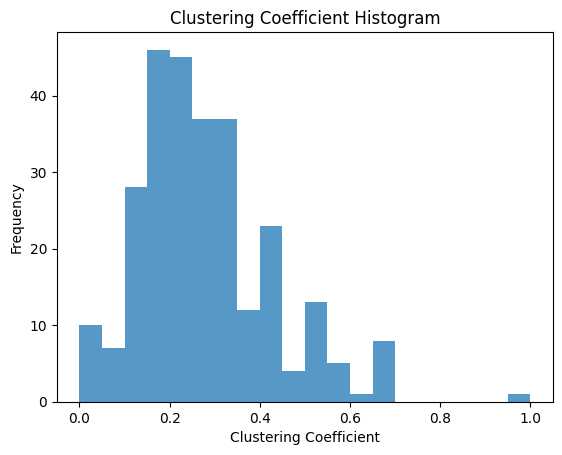

In [7]:
# Calculate the clustering coefficient for each node
clustering_coefficients = nx.clustering(G)

average_clustering_coefficient = nx.average_clustering(G)
print(average_clustering_coefficient)
# Create a histogram of the clustering coefficients
plt.hist(clustering_coefficients.values(), bins=20, alpha=0.75)
plt.title('Clustering Coefficient Histogram')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

We can compare it with a randomly generated graph with the same amount of nodes and edges and observe a considerably lower clustering coefficient

0.046321317536683386


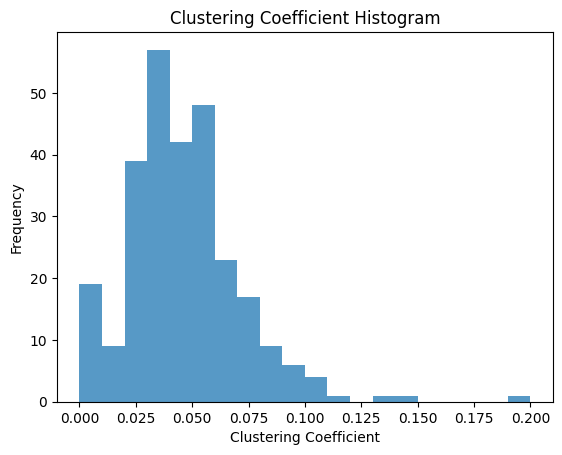

In [8]:
N_nodes = G.number_of_nodes()
N_edges = G.number_of_edges()

G_random = nx.gnm_random_graph(N_nodes, N_edges)

# Calculate the clustering coefficient for each node
clustering_coefficients = nx.clustering(G_random)

average_clustering_coefficient_random = nx.average_clustering(G_random)
print(average_clustering_coefficient_random)
# Create a histogram of the clustering coefficients
plt.hist(clustering_coefficients.values(), bins=20, alpha=0.75)
plt.title('Clustering Coefficient Histogram')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

# Topological overlapping

to measure topological overlap we can use the **matching index**


In [1]:
def calculate_jaccard_index(graph, node1, node2):
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))

    intersection_size = len(neighbors1.intersection(neighbors2))
    union_size = len(neighbors1.union(neighbors2))

    if union_size == 0:
        return 0.0  # Handle the case when both sets are empty

    jaccard_index = intersection_size / union_size
    return jaccard_index



In [11]:
calculate_jaccard_index(G,1,3)

0.029411764705882353

given a node we find the most "topologically overlapping" node

In [12]:
def find_node_with_max_jaccard(graph, node):
    max_index = 0
    max_node = None

    for other_node in graph.nodes():
        if other_node != node:
            index = calculate_jaccard_index(graph, node, other_node)
            if index > max_index:
                max_index = index
                max_node = other_node

    return max_node, max_index

Given the target_node, we look for the one with the highest Jaccard index, we keep the subgraph that includes both and their neighbors to visualize how they share them.

Neighbor node with the highest Jaccard Index: 171 (Index: 0.2692307692307692)


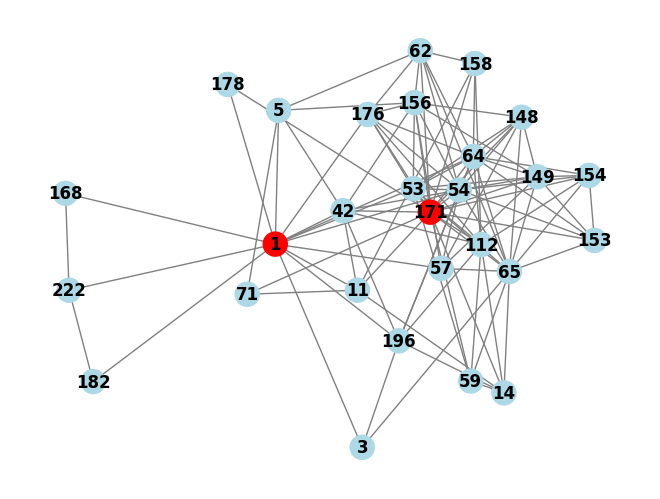

In [16]:
target_node = 1
max_node, max_index = find_node_with_max_jaccard(G, target_node)

print(f"Neighbor node with the highest Jaccard Index: {max_node} (Index: {max_index})")

# Get the subgraph of neighbors of both nodes
neighbor_nodes =  set(G.neighbors(target_node)).union(set(G.neighbors(max_node))).union({target_node, max_node})
subgraph = G.subgraph(neighbor_nodes)

# Draw the subgraph
pos = nx.spring_layout(subgraph)
node_colors = ['red' if node in [target_node, max_node] else 'lightblue' for node in subgraph.nodes()]
nx.draw(subgraph, pos, with_labels=True, font_weight='bold', node_color=node_colors, edge_color='gray')
plt.show()

we can visualize the Jaccard Index matrix as a heatmap

In [ ]:
import seaborn as sns

# Get the list of nodes
nodes = list(G.nodes())

# Create an empty matrix to store Jaccard Index values
jaccard_matrix = np.zeros((len(nodes), len(nodes)))

# Fill in the matrix with Jaccard Index values.
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        jaccard_matrix[i, j] = calculate_jaccard_index(G, nodes[i], nodes[j])
        jaccard_matrix[j, i] = jaccard_matrix[i, j]



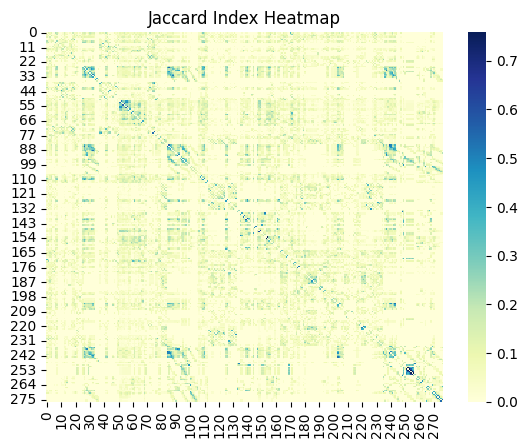

In [18]:
# Visualize the Jaccard Index matrix as a heatmap
sns.heatmap(jaccard_matrix, cmap="YlGnBu")
plt.title("Jaccard Index Heatmap")
plt.show()

Is there a relationship between spatial distance and jaccard index? let's see it. First we will compute the distance matrix (Euclidean).

In [22]:
# Load the CSV file with node positions
df = pd.read_csv("/content/drive/My Drive/Grafos y Cerebro/celegans277positions.csv", header=None, names=['x', 'y'])




Distance Matrix:
[[0.         0.00485028 0.00517085 ... 0.50068416 0.6089128  0.70011123]
 [0.00485028 0.         0.00400356 ... 0.50408706 0.61227876 0.70342523]
 [0.00517085 0.00400356 0.         ... 0.50585366 0.61408322 0.70528208]
 ...
 [0.50068416 0.50408706 0.50585366 ... 0.         0.10837074 0.19995329]
 [0.6089128  0.61227876 0.61408322 ... 0.10837074 0.         0.09168437]
 [0.70011123 0.70342523 0.70528208 ... 0.19995329 0.09168437 0.        ]]


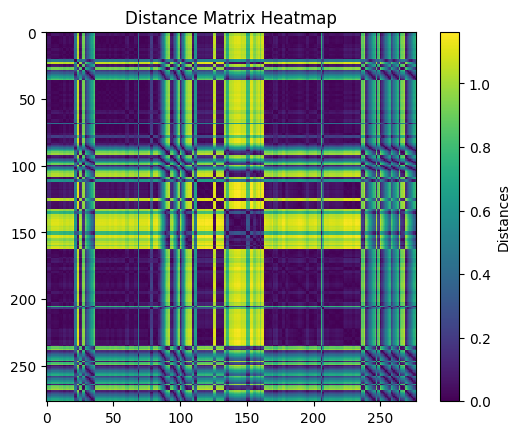

In [25]:
from scipy.spatial.distance import pdist, squareform
# Get the node positions as a matrix
positions = df[['x', 'y']].values

# Calculate the matrix of Euclidean distances between nodes
distances = pdist(positions)

# Convert the distance matrix to a square matrix
distance_matrix = squareform(distances)

# Display the distance matrix
print("\nDistance Matrix:")
print(distance_matrix)

# Display the heatmap of the distance matrix
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Distances')
plt.title('Distance Matrix Heatmap')
plt.show()

now we plot the jaccard index of the node vs the euclidean distance.

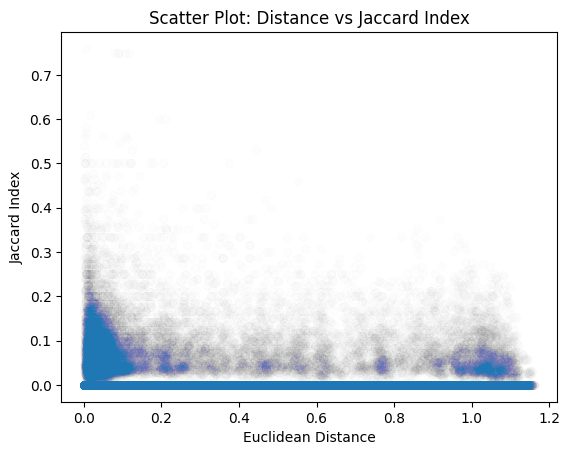

In [29]:
# Flatten the matrices to 1D arrays for plotting
distance_values = distance_matrix.flatten()
jaccard_values = jaccard_matrix.flatten()

# Create a scatter plot
plt.scatter(distance_values, jaccard_values, alpha=0.005)
plt.xlabel('Euclidean Distance')
plt.ylabel('Jaccard Index')
plt.title('Scatter Plot: Distance vs Jaccard Index')
plt.show()